## Making Data Useable

This data is hosted at [Space-Track.org](https://www.space-track.org/). In this, I take a list of all objects launched since 1958 and alter the data so I have only objects that have not decayed, and calculate the cumulative number of non-decayed objects in orbit each year.

In [ ]:
import numpy as np
import pandas as pd

In [15]:
satcat = pd.read_csv(r'C:\Users\tabey\Downloads\satcat.csv') #first I read in the data I am altering
new_satcat = satcat[satcat['DECAY_DATE'] == 'not decayed'] #this creates a new .csv file keeping only the rows I've specified
                                                           #== keeps things that are 'within this' (all rows that have 'not
                                                           #decayed' in the column 'DECAY_DATE')
                                                           #!= would keep things that are not 'within this'

new_satcat.to_csv(r'C:\Users\tabey\Downloads\satcat_not_decayed.csv', index=False) #this exports the new csv file; 
#first column below with random numbers is index; doesn't really matter

In [16]:
new_satcat #this just prints the new csv file so you can preview it

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,3/17/1958,AFETR,not decayed,132.71,34.26,3832.0,649.0,0.1220,NaN,EA,ORB
10,VANGUARD 2,1959-001A,11,PAY,NaN,US,2/17/1959,AFETR,not decayed,121.33,32.87,2928.0,553.0,0.3931,NaN,EA,ORB
11,VANGUARD R/B,1959-001B,12,R/B,NaN,US,2/17/1959,AFETR,not decayed,125.73,32.90,3316.0,555.0,0.5266,NaN,EA,ORB
15,VANGUARD R/B,1958-002A,16,R/B,NaN,US,3/17/1958,AFETR,not decayed,137.30,34.26,4223.0,652.0,0.2282,NaN,EA,ORB
19,VANGUARD 3,1959-007A,20,PAY,NaN,US,9/18/1959,AFETR,not decayed,124.44,33.35,3249.0,508.0,0.6412,NaN,EA,ORB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55920,OBJECT A,2023-041A,55981,PAY,+,US,3/24/2023,RLLB,not decayed,93.65,42.02,458.0,448.0,NaN,NaN,EA,ORB
55921,OBJECT B,2023-041B,55982,PAY,+,US,3/24/2023,RLLB,not decayed,93.65,42.02,456.0,450.0,NaN,NaN,EA,ORB
55922,OBJECT C,2023-041C,55983,UNK,NaN,US,3/24/2023,RLLB,not decayed,93.61,42.02,457.0,445.0,NaN,NaN,EA,ORB
55923,OBJECT D,2023-041D,55984,UNK,NaN,US,3/24/2023,RLLB,not decayed,91.37,41.95,447.0,237.0,NaN,NaN,EA,ORB


### What I needed to figure out to make the number of objects cumulative:
- how to take last four character from each row in column
- how to make that a column
- how to count how many rows have a given year and years before it

### Explaining the code below:
- for is a loop; date is every entry in new_satcat[]; new_satcat is name of data frame, 'LAUNCH_DATE' is the column beinng read
- the for loop finds the entry in the column, names it date, then loops through all rows
- the indented stuff is inside the loop, basically 'editing' what's in column then saving as date; date is a string
- with a string, brackets [] with a number return the associated character; if you put a neg index, it counts backwards
- : returns characters from a number to a number, i.e. 0:2 is character 1 to character 2
- if it is empty on the right, it returns characters from number on left to the end
- -4: takes characters from the 4th to last to the end (for my data, the four characters in 'LAUNCH_DATE' that make the year, i.e. 1958, 2002, etc.)
- .append() is adding what is in brackets (year) to the list (list_of_years)

In [20]:
list_of_years = [] #list_of_years is an empty list for storing years

for date in new_satcat['LAUNCH_DATE']:
    year = date[-4:] # last 4 characters
    list_of_years.append(year)

new_satcat.insert(7, 'LAUNCH_YEAR', list_of_years) #this adds a new column 'LAUNCH_YEAR' with rows from 'list_of_years'
                                                   #7 is the position of the column (starting from 0)

In [27]:
count = new_satcat['LAUNCH_YEAR'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
print(count) #this counts how many time each year appears in the column 'LAUNCH_YEAR'
             #this effectively shows how many objects were launched each year (that haven't decayed as of 2023)

1999    3119
2022    3055
2021    1754
1993    1225
2020    1150
        ... 
1964      61
1962      33
1960      13
1959       6
1958       3
Name: LAUNCH_YEAR, Length: 66, dtype: int64


In [23]:
count.to_csv(r'C:\Users\tabey\Downloads\count.csv') #this creates a new.csv file with only the years and the count for each year

In [28]:
#once I made a new csv file with the number of objects in orbit each year, I copied the row 'COUNT' into a csv file 'orbit years'
#which also had a column for 'LAUNCH_YEAR'
#I did this in Excel rather than Jupyter

orbityears = pd.read_csv(r'C:\Users\tabey\Downloads\orbityears.csv') #must read csv file in again if you edit it at all

In [30]:
orbityears = orbityears.sort_values(by=['LAUNCH_YEAR'], ascending=True) #this is from sonification code

np.cumsum(orbityears['COUNT']) #this calculates the cumulative sum of the COUNT column for each row
totalyrs = np.cumsum(orbityears['COUNT']) #after doing the above, define it as something
orbityears.insert(2, 'TOTAL', totalyrs) #this adds the column (TOTAL) to the data frame (orbityears)
                                        #also 2 is the position of the column

In [31]:
orbityears.to_csv(r'C:\Users\tabey\sonify\orbityearz.csv') #turn orbityears into a csv file

In [37]:
orbityearz = pd.read_csv(r'C:\Users\tabey\sonify\orbityearz.csv')

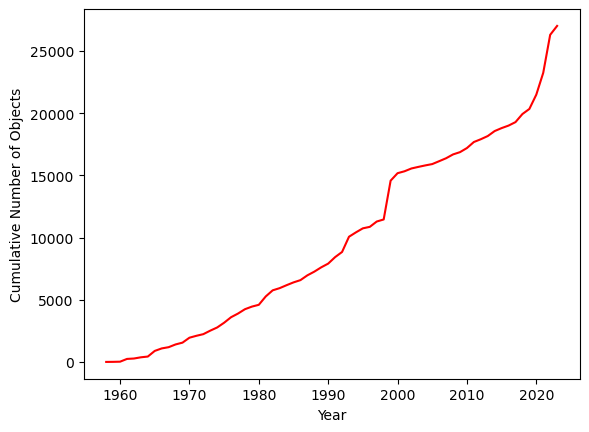

In [38]:
#this is just stuff I did in the sonification code
import matplotlib.pylab as plt

Years = orbityears['YEAR']
Objects = orbityears['TOTAL']

plt.plot(Years, Objects, c='red')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Objects')
plt.show()